**SISTEMA DE SEGMENTACIÓN DE CLIENTES.**

In [2]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=55bd21cc12615086a4d112930347a06dd4946e2aca121590f8a42ddb030fd42f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
##Variables de entrada.
ahorro = ctrl.Antecedent(np.arange(0,501,1),'Dinero_ahorrado')
salario = ctrl.Antecedent(np.arange(0,20,0.5),'Salario_cliente')

##Variable de salida.
cliente_preferencial = ctrl.Consequent(np.arange(0,101,1),'Preferencial')

Funiones de membresía.

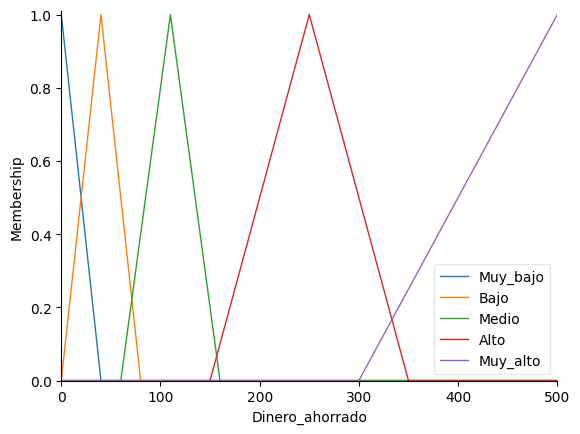

In [4]:
##Cantidad de dinero ahorrada en el banco.
ahorro['Muy_bajo'] = fuzz.trimf(ahorro.universe,[0,0,40])
ahorro['Bajo'] = fuzz.trimf(ahorro.universe,[0,40,80])
ahorro['Medio'] = fuzz.trimf(ahorro.universe,[60,110,160])
ahorro['Alto'] = fuzz.trimf(ahorro.universe,[150,250,350])
ahorro['Muy_alto'] = fuzz.trimf(ahorro.universe,[300,500,500])
ahorro.view()

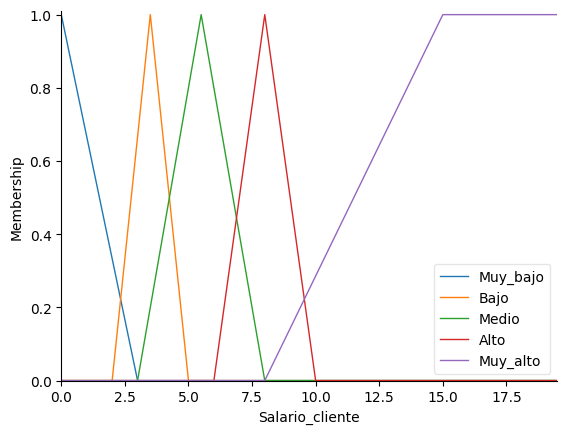

In [5]:
##Salario del cliente.
salario['Muy_bajo'] = fuzz.trimf(salario.universe,[0,0,3])
salario['Bajo'] = fuzz.trimf(salario.universe,[2,3.5,5])
salario['Medio'] = fuzz.trimf(salario.universe,[3,5.5,8])
salario['Alto'] = fuzz.trimf(salario.universe,[6,8,10])
salario['Muy_alto'] = fuzz.trapmf(salario.universe,[8,15,20,20])
salario.view()

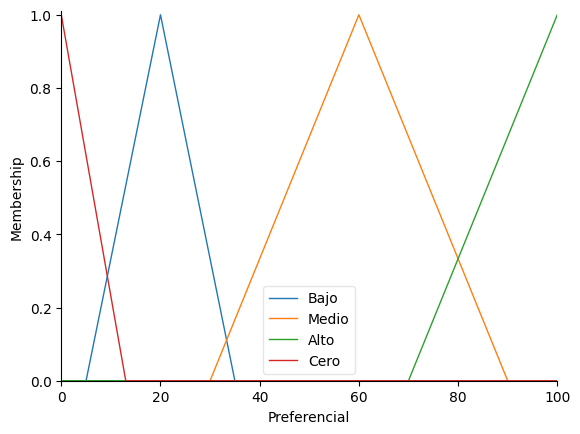

In [184]:
##Probabilidad de ser un cliente preferencial.
cliente_preferencial['Cero'] = fuzz.trimf(cliente_preferencial.universe,[0,0,13])
cliente_preferencial['Bajo'] = fuzz.trimf(cliente_preferencial.universe,[5,20,35])
cliente_preferencial['Medio'] = fuzz.trimf(cliente_preferencial.universe,[30,60,90])
cliente_preferencial['Alto'] = fuzz.trimf(cliente_preferencial.universe,[70,100,100])
cliente_preferencial.view()

Reglas difusas.

In [185]:
regla11 = ctrl.Rule(ahorro['Muy_bajo'] & salario['Muy_bajo'],cliente_preferencial['Cero'])
regla21 = ctrl.Rule(ahorro['Bajo'] & salario['Muy_bajo'],cliente_preferencial['Bajo'])
regla31 = ctrl.Rule(ahorro['Medio'] & salario['Muy_bajo'],cliente_preferencial['Bajo'])
regla41 = ctrl.Rule(ahorro['Alto'] & salario['Muy_bajo'],cliente_preferencial['Bajo'])
regla51 = ctrl.Rule(ahorro['Muy_alto'] & salario['Muy_bajo'],cliente_preferencial['Medio'])

regla12 = ctrl.Rule(ahorro['Muy_bajo'] & salario['Bajo'],cliente_preferencial['Bajo'])
regla22 = ctrl.Rule(ahorro['Bajo'] & salario['Bajo'],cliente_preferencial['Bajo'])
regla32 = ctrl.Rule(ahorro['Medio'] & salario['Bajo'],cliente_preferencial['Bajo'])
regla42 = ctrl.Rule(ahorro['Alto'] & salario['Bajo'],cliente_preferencial['Medio'])
regla52 = ctrl.Rule(ahorro['Muy_alto'] & salario['Bajo'],cliente_preferencial['Medio'])

regla13 = ctrl.Rule(ahorro['Muy_bajo'] & salario['Medio'],cliente_preferencial['Bajo'])
regla23 = ctrl.Rule(ahorro['Bajo'] & salario['Medio'],cliente_preferencial['Bajo'])
regla33 = ctrl.Rule(ahorro['Medio'] & salario['Medio'],cliente_preferencial['Medio'])
regla43 = ctrl.Rule(ahorro['Alto'] & salario['Medio'],cliente_preferencial['Alto'])
regla53 = ctrl.Rule(ahorro['Muy_alto'] & salario['Medio'],cliente_preferencial['Alto'])

regla14 = ctrl.Rule(ahorro['Muy_bajo'] & salario['Alto'],cliente_preferencial['Medio'])
regla24 = ctrl.Rule(ahorro['Bajo'] & salario['Alto'],cliente_preferencial['Medio'])
regla34 = ctrl.Rule(ahorro['Medio'] & salario['Alto'],cliente_preferencial['Alto'])
regla44 = ctrl.Rule(ahorro['Alto'] & salario['Alto'],cliente_preferencial['Alto'])
regla54 = ctrl.Rule(ahorro['Muy_alto'] & salario['Alto'],cliente_preferencial['Alto'])

regla15 = ctrl.Rule(ahorro['Muy_bajo'] & salario['Muy_alto'],cliente_preferencial['Medio'])
regla25 = ctrl.Rule(ahorro['Bajo'] & salario['Muy_alto'],cliente_preferencial['Medio'])
regla35 = ctrl.Rule(ahorro['Medio'] & salario['Muy_alto'],cliente_preferencial['Alto'])
regla45 = ctrl.Rule(ahorro['Alto'] & salario['Muy_alto'],cliente_preferencial['Alto'])
regla55 = ctrl.Rule(ahorro['Muy_alto'] & salario['Muy_alto'],cliente_preferencial['Alto'])

In [186]:
sistema_control = ctrl.ControlSystem(
    [
        regla11,
        regla12,
        regla13,
        regla14,
        regla15,
        regla21,
        regla22,
        regla23,
        regla24,
        regla25,
        regla31,
        regla32,
        regla33,
        regla34,
        regla35,
        regla41,
        regla42,
        regla43,
        regla44,
        regla45,
        regla51,
        regla52,
        regla53,
        regla54,
        regla55
    ]
)

Controlador = ctrl.ControlSystemSimulation(sistema_control)

In [192]:
Controlador.input['Dinero_ahorrado']=500
Controlador.input['Salario_cliente']=15
Controlador.compute()

Probabilidad = Controlador.output['Preferencial']
print(f"La probabilidad de que el cliente sea clasificado como preferencial es de: {Probabilidad} %")

La probabilidad de que el cliente sea clasificado como preferencial es de: 90.00000000000003 %
